## Brief

**Project goal**: prioritize these hypotheses, launch an A/B test, and analyze the results.

Data used in the first part of the project:

1. Hypotheses

- `Hypotheses` — brief descriptions of the hypotheses
- `Reach` — user reach, on a scale of one to ten
- `Impact` — impact on users, on a scale of one to ten
- `Confidence` — confidence in the hypothesis, on a scale of one to ten
- `Effort` — the resources required to test a hypothesis on a scale of one to ten.

Data used in the second part of the project:

2. Orders

- `transactionId` — order identifier
- `visitorId` — identifier of the user who placed the order
- `date` — of the order
- `revenue` — from the order
- `group` — the A/B test group that the user belongs to

3. Visits

- `date` — date
- `group` — A/B test group
- `visits` — the number of visits on the date specified in the A/B test group specified

**Part 1. Prioritizing Hypotheses**

- Apply the ICE framework to prioritize hypotheses. Sort them in descending order of priority.
- Apply the RICE framework to prioritize hypotheses. Sort them in descending order of priority.
- Show how the prioritization of hypotheses changes when you use RICE instead of ICE. Provide an explanation for the changes.

**Part 2. A/B Test Analysis**

- Graph cumulative revenue by group.
- Graph cumulative average order size by group.
- Graph the relative difference in cumulative average order size for group B compared with group A.
- Calculate each group's conversion rate as the ratio of orders to the number of visits for each day. Plot the daily conversion rates of the two groups and describe the difference.
- Plot a scatter chart of the number of orders per user.
- Calculate the 95th and 99th percentiles for the number of orders per user.
- Plot a scatter chart of order prices.
- Calculate the 95th and 99th percentiles of order prices.
- Find the statistical significance of the difference in conversion between the groups using the raw data.
- Find the statistical significance of the difference in average order size between the groups using the raw data.
- Find the statistical significance of the difference in conversion between the groups using the filtered data. 
- Find the statistical significance of the difference in average order size between the groups using the filtered data.

Make a decision based on the test results.

# Part 1. Prioritizing Hypotheses

In [1]:
# Loading all the libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import math
import random
from matplotlib import pyplot
import datetime as dt

In [2]:
# Load the data

hypotheses = pd.read_csv('/datasets/hypotheses_us.csv', delimiter=';')
orders = pd.read_csv('/datasets/orders_us.csv')
visitors = pd.read_csv('/datasets/visits_us.csv')

In [3]:
# Let's look at hypotheses data

hypotheses

,Hypothesis,Reach,Impact,Confidence,Effort
0,Add two new channels for attracting traffic. T...,3,10,8,6
1,Launch your own delivery service. This will sh...,2,5,4,10
2,Add product recommendation blocks to the store...,8,3,7,3
3,Change the category structure. This will incre...,8,3,3,8
4,Change the background color on the main page. ...,3,1,1,1
5,Add a customer review page. This will increase...,3,2,2,3
6,Show banners with current offers and sales on ...,5,3,8,3
7,Add a subscription form to all the main pages....,10,7,8,5
8,Launch a promotion that gives users discounts ...,1,9,9,5


**Apply the ICE framework to prioritize hypotheses. Sort them in descending order of priority.**

In [4]:
# Apply the ICE framework to prioritize hypotheses

hypotheses['ICE'] = hypotheses['Impact'] * hypotheses['Confidence'] / hypotheses['Effort']
hypotheses[['Hypothesis', 'ICE']].sort_values(by=['ICE'], ascending=False)

,Hypothesis,ICE
8,Launch a promotion that gives users discounts ...,16.200000
0,Add two new channels for attracting traffic. T...,13.333333
7,Add a subscription form to all the main pages....,11.200000
6,Show banners with current offers and sales on ...,8.000000
2,Add product recommendation blocks to the store...,7.000000
1,Launch your own delivery service. This will sh...,2.000000
5,Add a customer review page. This will increase...,1.333333
3,Change the category structure. This will incre...,1.125000
4,Change the background color on the main page. ...,1.000000


ICE gives 8, 0, 7 and 6 like the most promising hypotheses.

**Apply the RICE framework to prioritize hypotheses. Sort them in descending order of priority.**

In [5]:
# Apply the RICE framework to prioritize hypotheses

hypotheses['RICE'] = hypotheses['Reach'] * hypotheses['Impact'] * hypotheses['Confidence'] / hypotheses['Effort']
hypotheses[['Hypothesis', 'RICE', 'ICE']].sort_values(by=['RICE'], ascending=False)

,Hypothesis,RICE,ICE
7,Add a subscription form to all the main pages....,112.0,11.200000
2,Add product recommendation blocks to the store...,56.0,7.000000
0,Add two new channels for attracting traffic. T...,40.0,13.333333
6,Show banners with current offers and sales on ...,40.0,8.000000
8,Launch a promotion that gives users discounts ...,16.2,16.200000
3,Change the category structure. This will incre...,9.0,1.125000
1,Launch your own delivery service. This will sh...,4.0,2.000000
5,Add a customer review page. This will increase...,4.0,1.333333
4,Change the background color on the main page. ...,3.0,1.000000


ICE gives 7, 2, 0, and 6 like the most promising hypotheses. The prioritization of hypotheses changes when we use RICE instead of ICE. In RICE, we use the Reach parameter to take into account how many users it will affect, so it influences the prioritization of hypotheses. For example, the Reach of the 7th hypothesis is the highest, raising the given hypothesis in the prioritization list.

**Intermediate Conclusions**

We applied the ICE framework to prioritize hypotheses, and it gave us 8, 0, 7, and 6 hypotheses like the most promising. After that, we applied the RICE framework, and it gave us 8, 0, 7, and 6 hypotheses like the best. So we will choose the RICE results because we need to consider how many users it will affect.

# Part 2. A/B Test Analysis

**Data Preprocessing**

In [6]:
# Let's look at orders data

orders

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,30.4,B
1,2804400009,3642806036,2019-08-15,15.2,B
2,2961555356,4069496402,2019-08-15,10.2,A
3,3797467345,1196621759,2019-08-15,155.1,B
4,2282983706,2322279887,2019-08-15,40.5,B
...,...,...,...,...,...
1192,2662137336,3733762160,2019-08-14,100.8,B
1193,2203539145,370388673,2019-08-14,50.1,A
1194,1807773912,573423106,2019-08-14,165.3,A
1195,1947021204,1614305549,2019-08-14,5.5,A


In [7]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   transactionId  1197 non-null   int64  
 1   visitorId      1197 non-null   int64  
 2   date           1197 non-null   object 
 3   revenue        1197 non-null   float64
 4   group          1197 non-null   object 
dtypes: float64(1), int64(2), object(2)
memory usage: 46.9+ KB


There are no missing values in this dataframe.

In [8]:
# Fix data types

orders['date']=pd.to_datetime(orders['date'],dayfirst=True)
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   transactionId  1197 non-null   int64         
 1   visitorId      1197 non-null   int64         
 2   date           1197 non-null   datetime64[ns]
 3   revenue        1197 non-null   float64       
 4   group          1197 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 46.9+ KB


In [9]:
# Let's see if we have duplicates

orders.duplicated().sum()

0

In [10]:
# Let's see if we have same visitors in both groups

orders[orders.duplicated('visitorId')].count()

transactionId    166
visitorId        166
date             166
revenue          166
group            166
dtype: int64

In [11]:
users_a = orders[orders['group'] == 'A']['visitorId'].unique()
users_b = orders[orders['group'] == 'B']['visitorId'].unique()
joint_set = set(users_a).intersection(set(users_b))

In [12]:
# Drop same visitors in both groups

orders = orders[~orders['visitorId'].isin(joint_set)]

In [13]:
# Check data on 0's

for i in orders:
    print(i, len(orders[orders[i]==0]))

transactionId 0
visitorId 0
date 0
revenue 0
group 0


In [14]:
# Let's look at visits data

visitors

,date,group,visits
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756
...,...,...,...
57,2019-08-27,B,720
58,2019-08-28,B,654
59,2019-08-29,B,531
60,2019-08-30,B,490


In [15]:
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    62 non-null     object
 1   group   62 non-null     object
 2   visits  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


There are no missing values in this dataframe.

In [16]:
# Fix data types

visitors['date']=pd.to_datetime(visitors['date'],dayfirst=True)
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    62 non-null     datetime64[ns]
 1   group   62 non-null     object        
 2   visits  62 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB


In [17]:
# Let's see if we have duplicates

visitors.duplicated().sum()

0

In [18]:
# Check data on 0's

for i in visitors:
    print(i, len(visitors[visitors[i]==0]))

date 0
group 0
visits 0


**Graph cumulative average revenue by group**

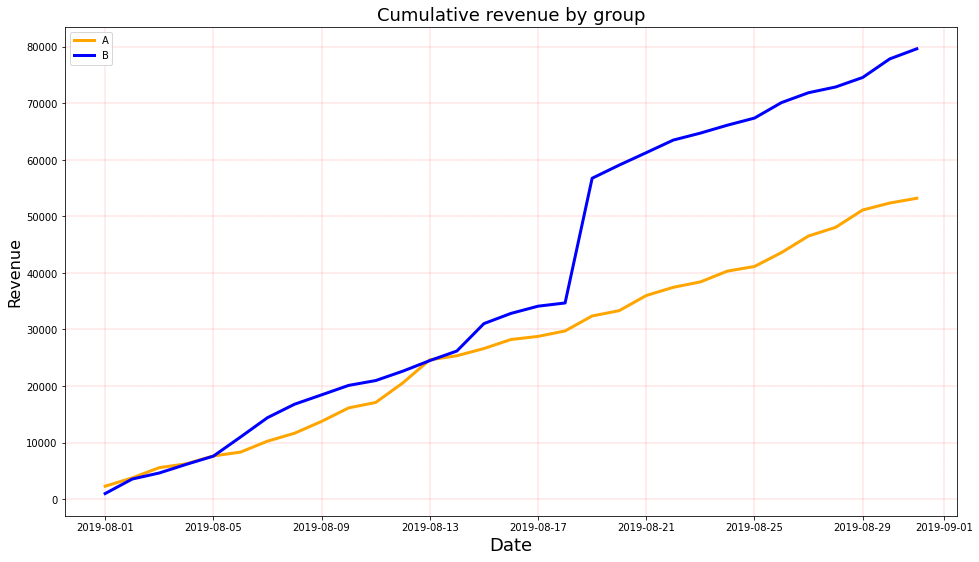

In [19]:
#cumulative revenue by group

datesGroups = orders[['date','group']].drop_duplicates()

datesGroups = orders[['date','group']].drop_duplicates()

ordersAggregated = datesGroups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], 
                                                                     orders['group'] == x['group'])].agg({
'date' : 'max',
'group' : 'max',
'transactionId' : pd.Series.nunique,
'visitorId' : pd.Series.nunique,
'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])

visitorsAggregated = datesGroups.apply(
lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])].agg({
'date' : 'max',
'group' : 'max',
'visits' : 'sum'}), axis=1).sort_values(by=['date','group'])

cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A', linewidth = 3, color = 'orange')

plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B', linewidth = 3, color='blue')

fig = plt.gcf()
fig.set_size_inches(16, 9)
plt.title('Cumulative revenue by group', fontsize=18)
plt.xlabel('Date', fontsize=18)
plt.ylabel('Revenue', fontsize=16)

plt.grid(color='r', linestyle='--', linewidth=0.2)

plt.legend()

The graph shows extreme revenue growth of 19/8 for group B. Abnormally big orders probably cause this. 

**Graph cumulative average order size by group.**

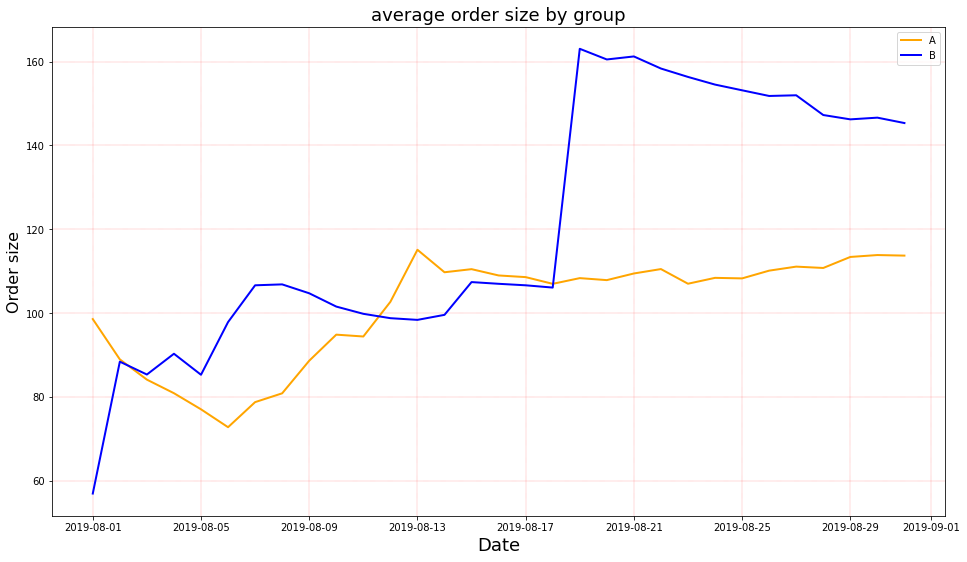

In [20]:
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A', linewidth = 2, color = 'orange')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B', linewidth = 2, color = 'blue')
fig = plt.gcf()
fig.set_size_inches(16, 9)
plt.title('Cumulative revenue by group', fontsize=18)
plt.xlabel('Date', fontsize=18)
plt.ylabel('Revenue', fontsize=16)
plt.grid(color='r', linestyle='--', linewidth=0.2)

plt.title('average order size by group', fontsize=18)
plt.xlabel('Date', fontsize=18)
plt.ylabel('Order size', fontsize=16)


plt.legend()

On average, the order size in group B is larger. At the same time, there is a spike on 8/19 in group B that says that average orders in group B were higher on that day. Other spikes notify that there are costly orders.

In [21]:
print(orders[orders['date'] == '2019-08-19'].groupby('visitorId').agg({'revenue': 'sum', 'group':'max'}).sort_values(by = 'revenue', ascending = False).head(10))

            revenue group
visitorId                
1920142716  19920.4     B
2912540959    680.8     A
2837914161    515.9     B
1357170471    490.4     A
154576532     410.5     B
2536252163    310.1     B
1957949546    260.0     A
290022471     255.5     B
4017075195    210.0     A
3282099314    185.4     A


Yes, we can see that on 19 August there was huge order made by a visitor from group B. 

**Graph the relative difference in cumulative average order size for group B compared with group A. Make conclusions and conjectures.**

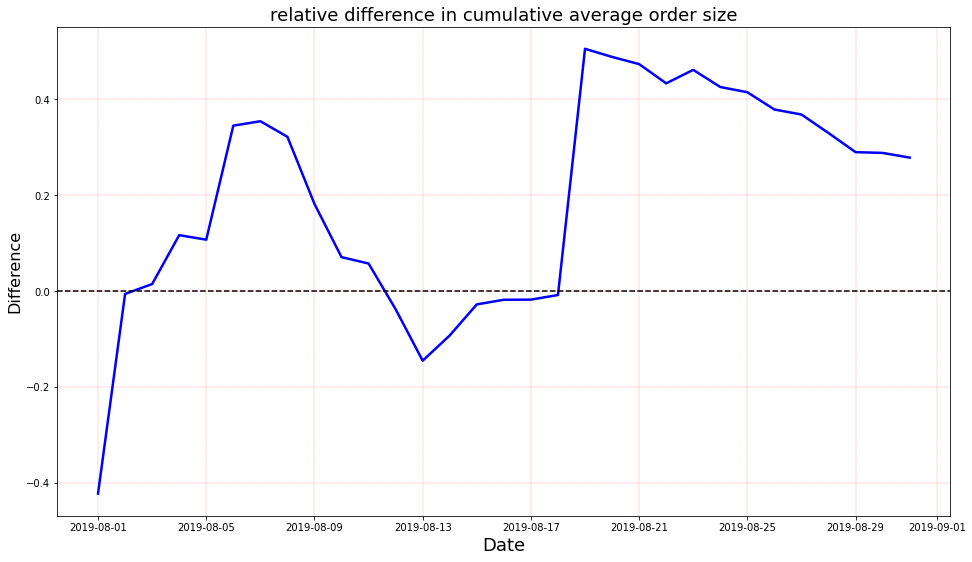

In [22]:
#relative difference in cumulative average order size

mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1, linewidth = 2.5, color = 'blue')

fig = plt.gcf()
fig.set_size_inches(16, 9)

plt.title('relative difference in cumulative average order size', fontsize=18)
plt.xlabel('Date', fontsize=18)
plt.ylabel('Difference', fontsize=16)

plt.grid(color='r', linestyle='--', linewidth=0.2)

plt.axhline(y=0, color='black', linestyle='--')

The difference between the segments spikes means that there are big orders and outliers.

**Calculate each group's conversion rate as the ratio of orders to the number of visits for each day. Plot the daily conversion rates of the two groups and describe the difference.**

(18109.0, 18139.0, 0.0, 0.06)

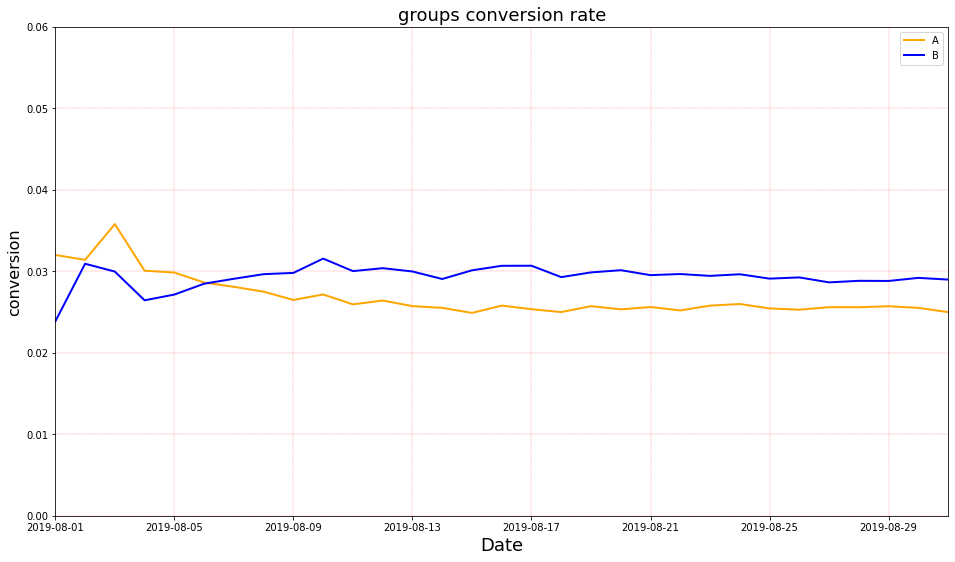

In [23]:
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A', linewidth = 2, color = 'orange')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B', linewidth = 2, color = 'blue')

fig = plt.gcf()
fig.set_size_inches(16, 9)


plt.title('groups conversion rate', fontsize=18)
plt.xlabel('Date', fontsize=18)
plt.ylabel('conversion', fontsize=16)

plt.grid(color='r', linestyle='--', linewidth=0.2)


plt.legend()
plt.axis([orders['date'].min(), orders['date'].max(), 0, 0.06])

Group B is fluctuating around a higher value than group A. In the beginning, group A had a higher conversion rate, though it dropped later.

(18109.0, 18139.0, -0.3, 0.5)

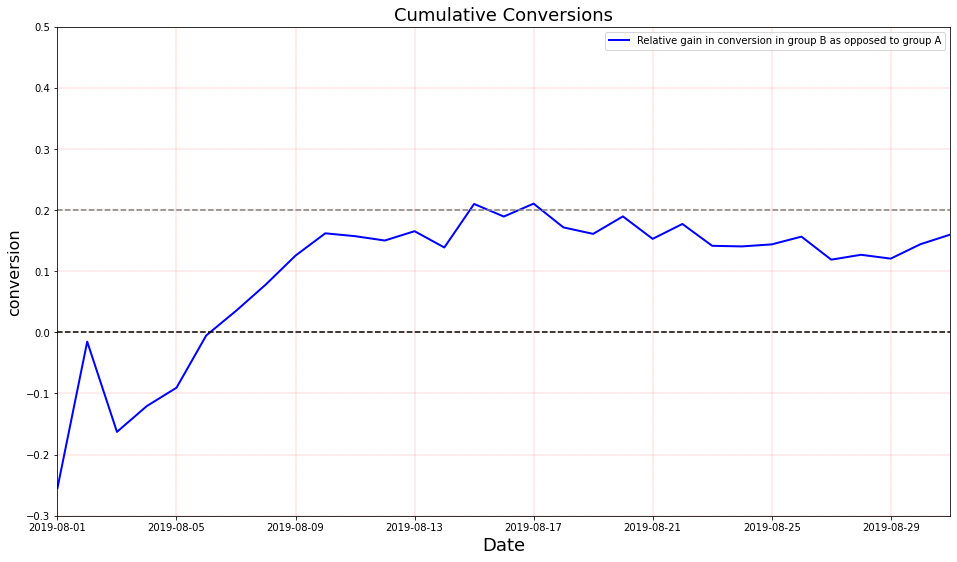

In [24]:
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1, label="Relative gain in conversion in group B as opposed to group A", linewidth = 2, color = 'blue')
plt.legend()
fig = plt.gcf()
fig.set_size_inches(16, 9)

plt.title('Cumulative Conversions', fontsize=18)
plt.xlabel('Date', fontsize=18)
plt.ylabel('conversion', fontsize=16)


plt.grid(color='r', linestyle='--', linewidth=0.2)
plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.2, color='grey', linestyle='--')
plt.axis([orders['date'].min(), orders['date'].max(), -0.3, 0.5])

In the beginning, we can see that group B had a lower conversion rate, though later it raised. Therefore, it can mean higher cumulative revenue and more expensive purchases. 

**Plot a scatter chart of the number of orders per user.**

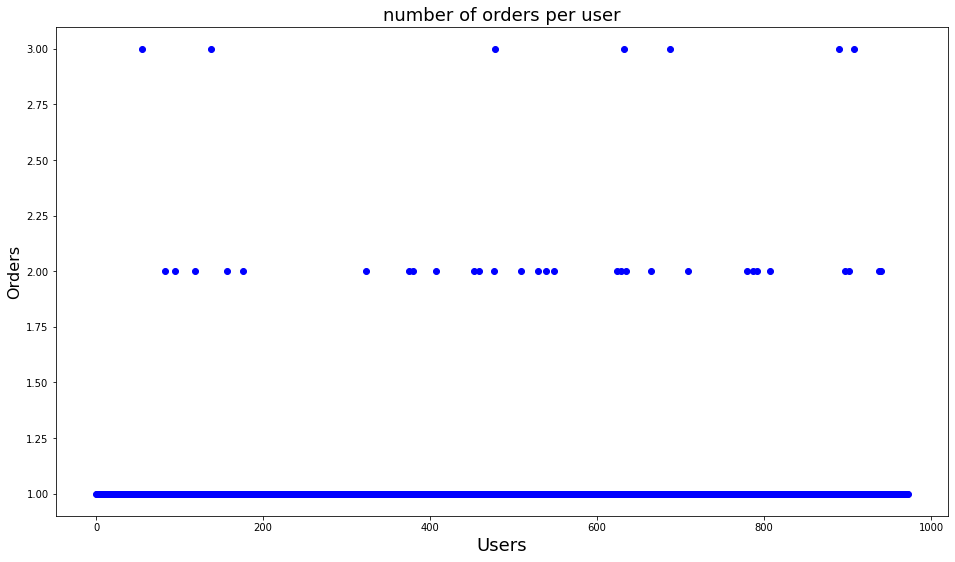

In [25]:
# Scatter chart of the number of orders per user

ordersByUsers = orders.drop(['group', 'revenue', 'date'], axis=1).groupby('visitorId', as_index=False).agg({'transactionId' : pd.Series.nunique})
ordersByUsers.columns = ['VisitorId','orders']
x_values = pd.Series(range(0,len(ordersByUsers)))

fig = plt.gcf()
fig.set_size_inches(16, 9)

plt.title('number of orders per user', fontsize=18)
plt.xlabel('Users', fontsize=18)
plt.ylabel('Orders', fontsize=16)

plt.scatter(x_values, ordersByUsers['orders'], color = 'blue')

There are only few users with more than 2 orders. However, this is in line with normal user behavior.

**Calculate the 95th and 99th percentiles for the number of orders per user. Define the point at which a data point becomes an anomaly.**

In [26]:
np.percentile(ordersByUsers['orders'], [95, 99])

array([1., 2.])

**Plot a scatter chart of order prices.**

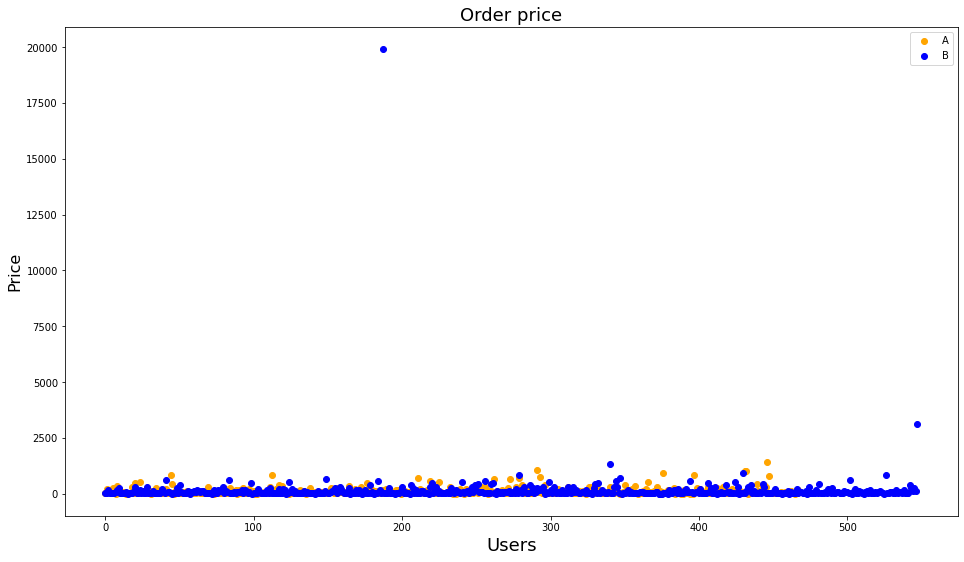

In [27]:
ordersA = orders[orders['group'] == 'A']
ordersB = orders[orders['group'] == 'B']

x_values = pd.Series(range(0, len(ordersA['revenue'])))
plt.scatter(x_values, ordersA['revenue'], color = 'orange')
y_values = pd.Series(range(0, len(ordersB['revenue'])))
plt.scatter(y_values, ordersB['revenue'], color = 'blue')

plt.title('Order price', fontsize=18)
plt.xlabel('Users', fontsize=18)
plt.ylabel('Price', fontsize=16)

fig = plt.gcf()
fig.set_size_inches(16, 9)

plt.legend('AB')

There are not many orders above 2500. There are outliers of about 3000 and 20000. The order of 20000 looks pretty anomalous.

**Calculate the 95th and 99th percentiles of order prices. Define the point at which a data point becomes an anomaly.**

In [28]:
np.percentile(orders['revenue'], [95, 99]) 

array([414.275, 830.3  ])

Not more than 5% of users placed orders that cost more than 414, and not more than 1% orders more expensive than 830.  We can consider this point as an anomaly (more than 830).

In [29]:
# Create Dataframe without outliers

for parameter in ['revenue']:
    ninety_nine = np.percentile(orders[parameter], 99)
    one = np.percentile(orders[parameter], 1)
    filtered_orders=orders[(orders[parameter]>=one)&(orders[parameter]<=ninety_nine)]

**Find the statistical significance of the difference in conversion between the groups using the raw data.**

Hypotheses:

- H0: There is no difference in conversion between the groups.
- H1: There is a difference in conversion between the groups.

**Find the statistical significance of the difference in average order size between the groups using the raw data.**

Hypotheses:

- H0: There is no difference in average order size between the groups.
- H1: There is a difference in average order size between the groups.

**Find the statistical significance of the difference in conversion between the groups using the filtered data.**

Hypotheses:

- H0: There is no difference in conversion between the groups.
- H1: There is a difference in conversion between the groups.

**Find the statistical significance of the difference in average order size between the groups using the filtered data.**

Hypotheses:

- H0: There is no difference in average order size between the groups.
- H1: There is a difference in average order size between the groups.

In [30]:
# Make tabels with filtered data

ordersAggregated_filtered = datesGroups.apply(lambda x: filtered_orders[np.logical_and(filtered_orders['date'] <= x['date'], filtered_orders['group'] == x['group'])].agg({
'date' : 'max',
'group' : 'max',
'transactionId' : pd.Series.nunique,
'visitorId' : pd.Series.nunique,
'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])

visitorsAggregated = datesGroups.apply(
lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])].agg({
'date' : 'max',
'group' : 'max',
'visits' : 'sum'}), axis=1).sort_values(by=['date','group'])

cumulativeData_filtered = ordersAggregated_filtered.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData_filtered.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']
cumulativeData_filtered['conversion'] = cumulativeData_filtered['orders']/cumulativeData_filtered['visitors']

In [31]:
control_raw = cumulativeDataA
test_raw = cumulativeDataB
control_filtered = cumulativeData_filtered[cumulativeData_filtered['group'] == 'A']
test_filtered = cumulativeData_filtered[cumulativeData_filtered['group'] == 'B']

In [32]:
#Total convertion check

control_trials=control_raw['visitors'].sum()
print("Trials:",control_trials)
control_successes=control_raw['orders'].sum()
print("Successes:",control_successes)

Trials: 305673
Successes: 7904


In [33]:
test_trials=test_raw['visitors'].sum()
print("Trials:",test_trials)
test_successes=test_raw['orders'].sum()
print("Successes:",test_successes)

Trials: 307092
Successes: 9038


In [34]:
def check_hypothesis(successes1,trials1, successes2,trials2, alpha=0.05):
    #proportion for success in the first group
    p1 = successes1/trials1

  #proportion for success in the second group
    p2 = successes2/trials2
    p_combined = (successes1 + successes2) / (trials1 + trials2)
  
    difference = p1 - p2

    z_value = difference / math.sqrt(p_combined * (1 - p_combined) * (1/trials1 + 1/trials2))
    distr = stats.norm(0, 1) 
    p_value = (1 - distr.cdf(abs(z_value))) * 2

    print('p-value: ', p_value)

In [35]:
check_hypothesis(control_successes,control_trials, test_successes,test_trials, alpha=0.05)

p-value:  0.0


We can see that convertion of the control group is equal to conversion of the test group.

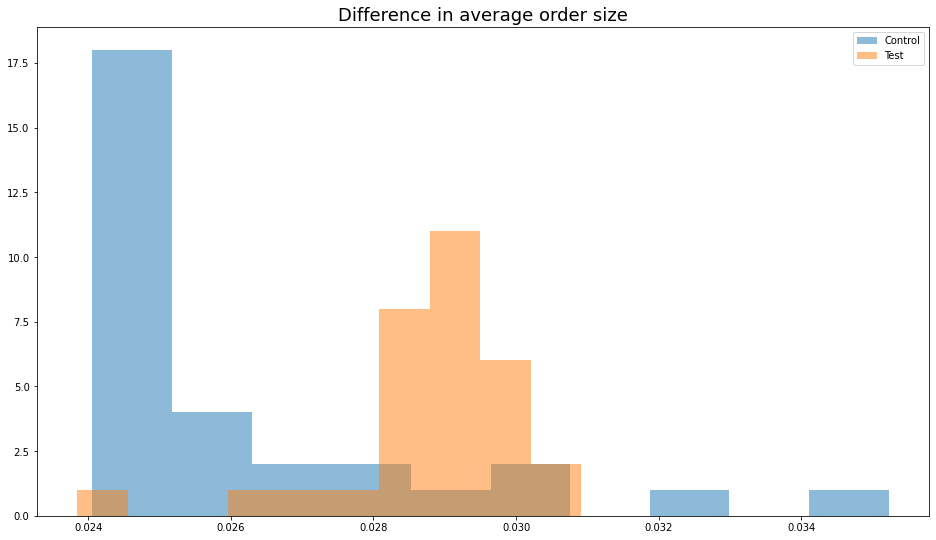

In [36]:
# Average daily conversion

fig = plt.gcf()
fig.set_size_inches(16, 9)

plt.title('Difference in average order size', fontsize=18)

pyplot.hist(control_filtered['conversion'], alpha=0.5, label='Control')
pyplot.hist(test_filtered['conversion'], alpha=0.5, label='Test')
pyplot.legend(loc='upper right')
pyplot.show()

We will check the normality of distribution with the Shapiro test. If our distribution is normal, we will use a t-test; if not - we will use Mann-Whitney. So we will write the function that will pick up the right test.

In [37]:
def testing_average(sample1,sample2,alpha=0.05):
    #checking normality
    sample1=sample1.dropna()
    sample2=sample2.dropna()
    stat1, p1_norm=stats.shapiro(sample1)
    stat2, p2_norm=stats.shapiro(sample2)
    if p1_norm > alpha and p2_norm>alpha:
        #then both normal, perform t-test.
        #for t-test also should check the equality of variances
        statslev,p_levene=stats.levene(sample1, sample2)
        if p_levene<alpha:
           #variances are not equal
            statist,p_value=stats.ttest_ind(sample1, sample2,equal_var=False)
        else:
            statist,p_value=stats.ttest_ind(sample1, sample2,equal_var=True) 
    else:
        statist,p_value=stats.mannwhitneyu(sample1, sample2)
    print(p_value)
    if p_value<alpha:
        print('Reject H0')
    else:
        print('Fail to Reject H0')

In [38]:
testing_average(control_filtered['conversion'],test_filtered['conversion'],alpha=0.05)

1.1953382465006899e-05
Reject H0


We reject that there is no difference in conversion between the groups in filtered data.

In [39]:
testing_average(control_raw['conversion'],test_raw['conversion'],alpha=0.05)

1.4496661752238628e-05
Reject H0


We reject that there is no difference in conversion between the groups in raw data.

In [40]:
# Testing average check

control_filtered['avg_ch']=control_filtered['revenue']/control_filtered['orders']
test_filtered['avg_ch']=test_filtered['revenue']/test_filtered['orders']

control_raw['avg_ch']=control_raw['revenue']/control_raw['orders']
test_raw['avg_ch']=test_raw['revenue']/test_raw['orders']

/tmp/ipykernel_120/1801877482.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  control_filtered['avg_ch']=control_filtered['revenue']/control_filtered['orders']
/tmp/ipykernel_120/1801877482.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_filtered['avg_ch']=test_filtered['revenue']/test_filtered['orders']
/tmp/ipykernel_120/1801877482.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the 

In [41]:
control_raw['avg_ch'].mean()

101.11552841801576

In [42]:
test_raw['avg_ch'].mean()

120.76430013945237

In [43]:
testing_average(control_raw['avg_ch'],test_raw['avg_ch'],alpha=0.05)

0.16338441712343454
Fail to Reject H0


Failed to reject the null hypothesis: we can't make conclusions about the difference.

In [44]:
testing_average(control_filtered['avg_ch'],test_filtered['avg_ch'],alpha=0.05)

0.020949904489239543
Reject H0


We reject that there is no difference in average order size between the groups in filtered data.

**Conclusions**

**Project goal**: prioritize these hypotheses, launch an A/B test, and analyze the results.

Data used in the first part of the project:

1. Hypotheses

- `Hypotheses` — brief descriptions of the hypotheses
- `Reach` — user reach, on a scale of one to ten
- `Impact` — impact on users, on a scale of one to ten
- `Confidence` — confidence in the hypothesis, on a scale of one to ten
- `Effort` — the resources required to test a hypothesis on a scale of one to ten.

Data used in the second part of the project:

2. Orders

- `transactionId` — order identifier
- `visitorId` — identifier of the user who placed the order
- `date` — of the order
- `revenue` — from the order
- `group` — the A/B test group that the user belongs to

3. Visits

- `date` — date
- `group` — A/B test group
- `visits` — the number of visits on the date specified in the A/B test group specified

**Part 1. Prioritizing Hypotheses**

What we did:

- Applied the ICE framework to prioritize hypotheses. Sort them in descending order of priority.

ICE gives 8, 0, 7, and 6 like the most promising hypotheses.

- Applied the RICE framework to prioritize hypotheses. Sort them in descending order of priority.

ICE gives 7, 2, 0, and 6 like the most promising hypotheses. The prioritization of hypotheses changes when we use RICE instead of ICE. In RICE, we use the Reach parameter to consider how many users it will affect, so it influences the prioritization of hypotheses. For example, the Reach of the 7th hypothesis is the highest, raising the given hypothesis in the prioritization list.

- Show how the prioritization of hypotheses changes when you use RICE instead of ICE. Provide an explanation for the changes.

We applied the ICE framework to prioritize hypotheses, and it gave us 8, 0, 7, and 6 hypotheses like the most promising. Then, after that, we applied the RICE framework, and it gave us 8, 0, 7, and 6 hypotheses like the best. So we will choose the RICE results because we need to consider how many users it will affect.

**Part 2. A/B Test Analysis**

What we did:

- Graph cumulative revenue by group.

The graph shows extreme revenue growth of 19/8 for group B. Abnormally big orders probably cause this. 

- Graph cumulative average order size by group.

On average, the order size in group B is larger. At the same time, there is a spike on 8/19 in group B that says that average orders in group B were higher on that day. Other spikes notify that there are costly orders.

- Graph the relative difference in cumulative average order size for group B compared with group A.

The difference between the segments spikes means big orders and outliers.

- Calculate each group's conversion rate as the ratio of orders to the number of visits for each day. Plot the daily conversion rates of the two groups and describe the difference.

Group B is fluctuating around a higher value than group A. In the beginning, group A had a higher conversion rate, though it dropped later.

In relative gain in conversion in group B as opposed to group A we can see that in the beginning, we can see that group B had a lower conversion rate, though later it raised. Therefore, it can mean higher cumulative revenue and more expensive purchases. 

- Plot a scatter chart of the number of orders per user.

There are only few users with more than 2 orders. However, this is in line with normal user behavior.

- Calculate the 95th and 99th percentiles for the number of orders per user. 

- Plot a scatter chart of order prices.

There are not many orders above 2500. There are outliers of about 3000 and 20000. The order of 20000 looks pretty anomalous.

- Calculate the 95th and 99th percentiles of order prices.

Not more than 5% of users placed orders that cost more than 414, and not more than 1% orders more expensive than 830. Therefore, we can consider this point an anomaly (more than 830).

- Find the statistical significance of the difference in conversion between the groups using the raw data.

We reject that there is no difference in conversion between the groups in raw data.

- Find the statistical significance of the difference in average order size between the groups using the raw data.

Failed to reject the null hypothesis: we can't make conclusions about the difference.

- Find the statistical significance of the difference in conversion between the groups using the filtered data. 

We reject that there is no difference in conversion between the groups in filtered data.

- Find the statistical significance of the difference in average order size between the groups using the filtered data.

We reject that there is no difference in average order size between the groups in filtered data.

- Make a decision based on the test results.

We have success in analyzing the conversion rate. However, we may consider the analysis of average order sizes unsuccessful. Therefore, the test should be stopped, and we should move on to the following hypothesis.